# Linear Least Squares (Batch)

From Crassidis & Junkins Section 1.2.1

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [2]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

# Generate sample time series data

In [3]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

In [4]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [5]:
y_tilde = y+v

# Plotting

<Axes: xlabel='Time', ylabel='y'>

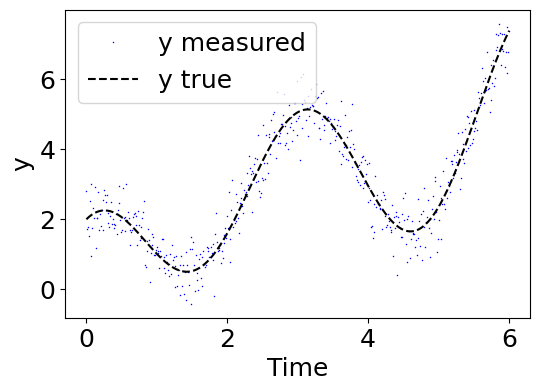

In [6]:
plot_tme(t, y, y_tilde)

# Candidate model

In [7]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Linear Least Squares

$\mathbf{\hat{x}}=(H^{\top}H)^{-1}H^{\top}\mathbf{\tilde{y}}$

### Model 1

In [8]:
x_1_hat = np.linalg.inv(model_1_H.T@model_1_H)@model_1_H.T@y_tilde
print(x_1_hat)

[[1.00806275]
 [1.0460845 ]
 [1.98924779]]


<Axes: xlabel='Time', ylabel='y'>

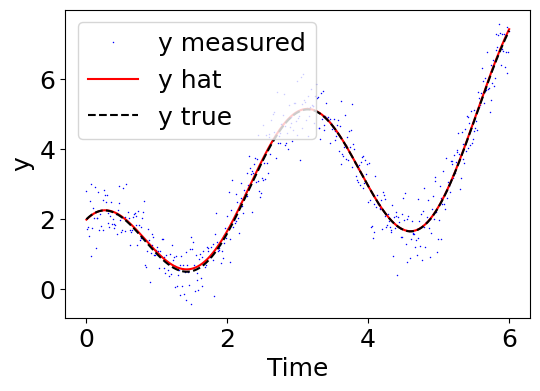

In [9]:
y_1_hat = model_1_H@x_1_hat
plot_tme(t, y, y_tilde, y_1_hat)

### Extrapolating

In [10]:
t = np.linspace(0, 12, 200)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T
y_tilde = y+v

### Extrapolate y predictions based on previous model 1 fit

In [11]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T
y_1_hat = model_1_H@x_1_hat

<Axes: xlabel='Time', ylabel='y'>

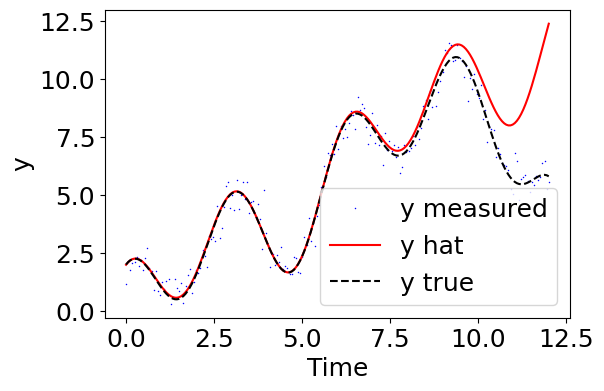

In [12]:
plot_tme(t, y, y_tilde, y_1_hat)

# Exercise: Repeat with Model 2

Now try with a different model - make a similar plot. 

In [13]:
model_2_H = np.vstack([t+2, t**2, t**3]).T

# Lessons learned and future learning

* Here we made a model from one "batch of data". 
  * How can you continuously integrate new information to refine your model? > Sequential Least Squares
* Here we assumed your measurements all have equal accuracy. 
  * How would you incorporate information from sensors with different accuracy? > Minimum Variance Estimation
* The extrapolation example shows that if you trust a bad model your estimates may be way off. 
  * How can you handle the case where you have a bad model (and you know it is bad)? > Kalman filter
* The extrapolation example shows that sometimes you don't have enough information to accurately estimate what you are interested in. 
  * How can you determine how well-posed your estimation problem is? > Observability
* We started with candidate models. 
  * What if you don't have any candidate models? > Data driven modeling
